<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!از صورتش معلومه
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
هدف این مسئله تشخیص جنسیت و تخمین گروه سنی افراد از روی تصاویر چهره‌ی آن‌ها است. برای انجام این کار، مجموعه‌ای از تصاویر چهره‌ی افراد به همراه ویژگی‌های مربوط به هر چهره در دسترس است. با استفاده از این مجموعه‌داده، قصد داریم مدلی بسازیم که بتواند با تحلیل تصاویر چهره، جنسیت و گروه سنی افراد را به درستی تشخیص دهد و پیش‌بینی کند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [18]:
import pandas as pd
import numpy as np

<h2 align="right" style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir="rtl" style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size="3">
مجموعه داده‌های تصویری شامل ۴۴۷۷۵ تصویر می‌باشد که شامل داده‌های آموزش و نمونه‌های آزمون است. تصاویر مربوط به هر شخص درون دایرکتوری خود قرار دارند. از هر شخص تعداد متغیری از تصاویر موجود است.
</font>
</p>

<p dir="rtl" style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size="3">
ویژگی‌های تصاویر مربوط به داده‌های آموزش در یک فایل برچسب‌گذاری با نام <code>train.csv</code> قرار دارد که شامل ۳۵۳۳۲ سطر است.
در این فایل ۴۷ ویژگی وجود دارد. داشتن یک ویژگی با عدد ۱+ نشان داده می‌شود، نداشتن یک ویژگی با عدد ۱- نشان داده می‌شود و نامعلوم بودن داشتن یا نداشتن یک ویژگی با عدد ۰ مشخص می‌شود.
توضیحات مربوط به ستون های مهم در این مسئله در جدول زیر آمده است.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Filename|اسم و دایرکتوری مربوط به تصویر|
|Identity|شماره‌ای یکتای مربوط به شخص درون تصویر|
|Male|مرد بودن|
|Young|جوان بودن|
|Middle_Aged|میانسال بودن|
|Senior|پیر بودن|
    
</font>
</div>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
دقت کنید که قرار گرفتن ۱+ در ستون <code>Male</code> به معنی مرد بودن و ۱- در این ستون به معنی زن بودن است.
</font>
</p>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. ویژگی‌های آموزشی در فایل <code>train.csv</code> و دایرکتوری مربوط به تصاویر نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید. دقت کنید که ستون های هدف از داده های آزمون حذف شده‌اند و هدف وجود این فایل دسترسی به دایرکتوری مربوط به تصاویر داده‌‌های آزمون است.
</font>
</p>


<p dir="rtl" style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <font face="vazir">
        <span style="color:orange"><b>نکته:</b></span>
        حجم فایل آموزشی و آزمون به‌ترتیب حدود ۶۵۵ مگابایت است. در صورتی‌که بارگذاری این فایل‌ها در محیط کولب برای‌تان دشوار است می‌توانید با استفاده از دستور زیر این دو فایل را به‌صورت مستقیم در محیط کولب بارگیری کنید.
        همچنین می‌توانید از لینک درایو زیر فایل‌ها را دانلود کرده و بر روی محیط دستگاه خود از آن استفاده کنید.
    </font>
</p>

<p dir="rtl" style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <font face="vazir">
        <a href="https://drive.google.com/file/d/1_mGrKY786DV8OpT9Xw5gmxJcY0aq3Bb8/view?usp=share_link" target="_blank" style="color:blue;">لینک دانلود از گوگل درایو</a>
    </font>
</p>





In [19]:
# Install gdown if not already installed
!pip install gdown

import gdown
import zipfile
import os

file_id = '1Y6lnYX7A-69wV_KVyg3eKhJQZMTNpVI6'
destination = 'downloaded_file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

if os.path.exists(destination):
    print("Download complete.")

    with zipfile.ZipFile(destination, 'r') as zip_ref:
        zip_ref.extractall('unzipped_content')

    print("Extraction complete. Files are available in the 'unzipped_content' directory.")
else:
    print("File download failed.")


Downloading...
From (original): https://drive.google.com/uc?id=1Y6lnYX7A-69wV_KVyg3eKhJQZMTNpVI6
From (redirected): https://drive.google.com/uc?id=1Y6lnYX7A-69wV_KVyg3eKhJQZMTNpVI6&confirm=t&uuid=ce0de6d1-f888-468e-8b0b-022f9076b08d
To: /content/downloaded_file.zip
100%|██████████| 560M/560M [00:10<00:00, 52.6MB/s]


Download complete.
Extraction complete. Files are available in the 'unzipped_content' directory.


In [20]:
train_data = pd.read_csv('/content/unzipped_content/data/train.csv')
train_data

Filename  Identity  Male  Young  Middle_Aged  Senior  Asian  \
0      n000003/0003_01.jpg         3     1      0            0      -1     -1   
1      n000003/0009_02.jpg         3     1     -1           -1       1     -1   
2      n000003/0010_01.jpg         3     1      0            0      -1     -1   
3      n000003/0012_01.jpg         3     1     -1           -1      -1     -1   
4      n000003/0014_01.jpg         3     1      0            0      -1     -1   
...                    ...       ...   ...    ...          ...     ...    ...   
35327  n000502/0380_01.jpg       502    -1      1           -1      -1     -1   
35328  n000502/0390_01.jpg       502    -1      1           -1      -1     -1   
35329  n000502/0396_01.jpg       502    -1      1           -1      -1      1   
35330  n000502/0398_01.jpg       502    -1      1           -1      -1     -1   
35331  n000502/0399_01.jpg       502    -1      1           -1      -1     -1   

       White  Black  Rosy_Cheeks  ...  Big_Nose  Pointy_Nose  Heavy_Makeup  \
0          1     -1           -1  ...         0            0            -1   
1          1     -1           -1  ...         0            0            -1   
2          1     -1           -1  ...         0            0            -1   
3          1     -1           -1  ...         0            0            -1   
4          1     -1           -1  ...         0            0            -1   
...      ...    ...          ...  ...       ...          ...           ...   
35327      1     -1            0  ...        -1            1             1   
35328      1     -1            0  ...        -1            1             1   
35329     -1     -1           -1  ...        -1            1             1   
35330     -1     -1           -1  ...        -1           -1            -1   
35331      0     -1            0  ...        -1            1             1   

       Wearing_Hat  Wearing_Earrings  Wearing_Necktie  Wearing_Lipstick  \
0               -1                -1                0                -1   
1               -1                -1                0                -1   
2               -1                -1                0                -1   
3               -1                -1                0                -1   
4               -1                -1                0                -1   
...            ...               ...              ...               ...   
35327           -1                 1               -1                 1   
35328           -1                 1               -1                 1   
35329           -1                 1               -1                 1   
35330           -1                 1               -1                -1   
35331           -1                 1               -1                 1   

       No_Eyewear  Eyeglasses  Attractive  
0               1          -1          -1  
1               1          -1          -1  
2               1          -1          -1  
3               1          -1          -1  
4               1          -1          -1  
...           ...         ...         ...  
35327           1          -1           1  
35328           1          -1           1  
35329           1          -1           1  
35330           0           0          -1  
35331           1          -1           1  

[35332 rows x 49 columns]

In [21]:
test_data = pd.read_csv('/content/unzipped_content/data/test.csv')
test_data

Filename  Identity  Asian  White  Black  Rosy_Cheeks  \
0     n000002/0001_01.jpg         2     -1      1     -1            0   
1     n000002/0012_01.jpg         2     -1      1     -1            0   
2     n000002/0013_01.jpg         2     -1      1     -1            0   
3     n000002/0018_04.jpg         2     -1      1     -1           -1   
4     n000002/0020_01.jpg         2     -1      1     -1            0   
...                   ...       ...    ...    ...    ...          ...   
8697  n000500/0481_01.jpg       500     -1      1     -1            0   
8698  n000500/0482_01.jpg       500     -1      1     -1            0   
8699  n000500/0483_02.jpg       500     -1      1     -1            0   
8700  n000500/0487_01.jpg       500     -1      1     -1            0   
8701  n000500/0493_01.jpg       500     -1      1     -1            0   

      Shiny_Skin  Bald  Wavy_Hair  Receding_Hairline  ...  Big_Nose  \
0              0    -1          1                 -1  ...        -1   
1              0    -1          1                 -1  ...        -1   
2              0    -1          1                 -1  ...        -1   
3              0    -1          1                 -1  ...        -1   
4              1    -1          1                 -1  ...        -1   
...          ...   ...        ...                ...  ...       ...   
8697           0    -1          1                 -1  ...        -1   
8698           1    -1          1                 -1  ...        -1   
8699           0    -1          1                 -1  ...        -1   
8700           0    -1          1                 -1  ...        -1   
8701           0    -1          1                 -1  ...        -1   

      Pointy_Nose  Heavy_Makeup  Wearing_Hat  Wearing_Earrings  \
0               1             1           -1                 1   
1               1             1           -1                 1   
2               1             1           -1                 1   
3               1             1           -1                 1   
4               1             1           -1                 1   
...           ...           ...          ...               ...   
8697            1             1           -1                 1   
8698            1             1           -1                 1   
8699            1            -1           -1                 1   
8700            1             1           -1                 1   
8701            1             1           -1                 1   

      Wearing_Necktie  Wearing_Lipstick  No_Eyewear  Eyeglasses  Attractive  
0                  -1                 1           1          -1           1  
1                  -1                 1           1          -1           1  
2                  -1                 1           1          -1           1  
3                  -1                 1           1          -1           1  
4                  -1                 1           1          -1           1  
...               ...               ...         ...         ...         ...  
8697               -1                 1           0          -1           1  
8698               -1                 1           1          -1           1  
8699               -1                 1           0           1          -1  
8700               -1                 1           0          -1           1  
8701               -1                 1           1          -1           1  

[8702 rows x 45 columns]


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
سپس نیاز است که تصاویر را از دایرکتوری های قرار گرفته در فایل های <code>test.csv</code> و <code>train.csv</code> بخوانید.
</font>
</p>

In [22]:
import pandas as pd
import os
from PIL import Image

def process_images(csv_path, image_folder):
    data = pd.read_csv(csv_path)
    print(data.head())

    for index, row in data.iterrows():
        filename = row['Filename']
        image_path = os.path.join(image_folder, filename)

        if os.path.exists(image_path):
            image = Image.open(image_path)
            print(f"Processing {filename} with attributes:")
            print(row.drop('Filename'))
        else:
            print(f"Image {filename} not found in folder {image_folder}.")

train_csv_path = '/content/unzipped_content/data/train.csv'
test_csv_path = '/content/unzipped_content/data/test.csv'
image_folder = '/content/unzipped_content/data/image_data'

print("Processing training images:")
process_images(train_csv_path, image_folder)

print("\nProcessing testing images:")
process_images(test_csv_path, image_folder)


Streaming output truncated to the last 5000 lines.
Brown_Hair                 -1
Gray_Hair                  -1
No_Beard                    1
Mustache                   -1
5_o_Clock_Shadow           -1
Goatee                     -1
Oval_Face                   1
Square_Face                -1
Round_Face                 -1
Double_Chin                -1
High_Cheekbones             1
Chubby                     -1
Obstructed_Forehead        -1
Fully_Visible_Forehead      0
Brown_Eyes                 -1
Bags_Under_Eyes            -1
Bushy_Eyebrows             -1
Arched_Eyebrows             1
Mouth_Closed                0
Smiling                     1
Big_Lips                    0
Big_Nose                   -1
Pointy_Nose                 1
Heavy_Makeup                1
Wearing_Hat                -1
Wearing_Earrings            1
Wearing_Necktie            -1
Wearing_Lipstick            1
No_Eyewear                  1
Eyeglasses                 -1
Attractive                  1
Name: 8593, dtype: 

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [23]:
import pandas as pd

csv_path = '/content/unzipped_content/data/train.csv'

data = pd.read_csv(csv_path)

print(f"Initial number of rows: {data.shape[0]}")

cleaned_data = data.dropna()

print(f"Number of rows after removing NaN values: {cleaned_data.shape[0]}")

cleaned_data.to_csv('cleaned_data_train.csv', index=False)

Initial number of rows: 35332
Number of rows after removing NaN values: 35332


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.

</font>
</p>

Epoch 1/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - age_output_accuracy: 0.7600 - gender_output_accuracy: 0.9953 - loss: 0.6830 - val_age_output_accuracy: 0.7781 - val_gender_output_accuracy: 1.0000 - val_loss: 0.5240
Epoch 2/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - age_output_accuracy: 0.7836 - gender_output_accuracy: 1.0000 - loss: 0.5148 - val_age_output_accuracy: 0.7875 - val_gender_output_accuracy: 1.0000 - val_loss: 0.4740
Epoch 3/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - age_output_accuracy: 0.7936 - gender_output_accuracy: 1.0000 - loss: 0.4755 - val_age_output_accuracy: 0.8070 - val_gender_output_accuracy: 1.0000 - val_loss: 0.4493
Epoch 4/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - age_output_accuracy: 0.8106 - gender_output_accuracy: 1.0000 - loss: 0.4384 - val_age_output_accuracy: 0.8063 - val_gender_output_accuracy: 1.0000 - val_loss: 0.4402
Epoch 5/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - age_output_accuracy: 0.8294 - gender_output_accuracy: 1.0000 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


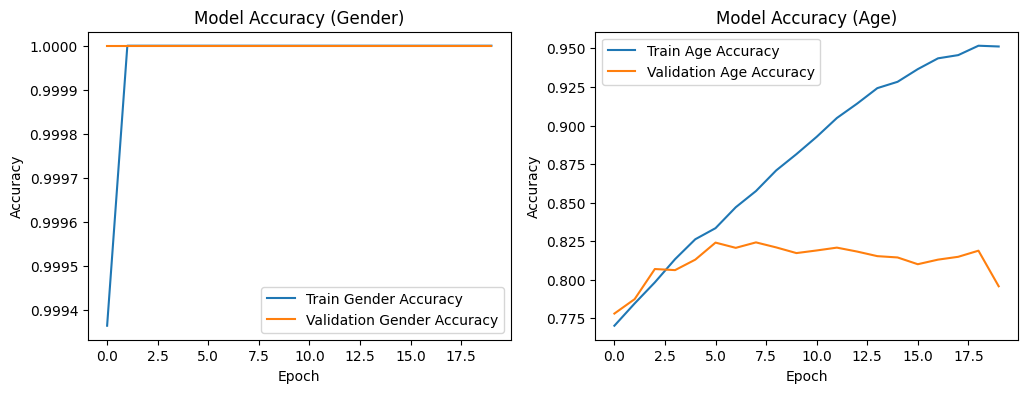

Model saved successfully.


In [25]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow opencv-python
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

data = pd.read_csv('/content/cleaned_data_train.csv')
image_folder = '/content/unzipped_content/data/image_data'

X = []
y_gender = []
y_age = []

for index, row in data.iterrows():
    img_path = os.path.join(image_folder, row['Filename'])
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    X.append(img_array)
    y_gender.append(row['Male'])  # 1 for Male, 0 for Female
    # Assuming age groups are defined: Young = 0, Middle_Aged = 1, Senior = 2
    age_group = np.argmax([row['Young'], row['Middle_Aged'], row['Senior']])
    y_age.append(age_group)

X = np.array(X)
y_gender = np.array(y_gender)
y_age = np.array(y_age)
X = X.astype('float32') / 255.0

X_train, X_test, y_train_gender, y_test_gender, y_train_age, y_test_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

y_train_gender = to_categorical(y_train_gender)
y_train_age = to_categorical(y_train_age)
y_test_gender = to_categorical(y_test_gender)
y_test_age = to_categorical(y_test_age)

input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

gender_output = Dense(2, activation='softmax', name='gender_output')(x)  # 2 classes for gender
age_output = Dense(3, activation='softmax', name='age_output')(x)        # 3 classes for age groups
model = Model(inputs=input_layer, outputs=[gender_output, age_output])

model.compile(optimizer='adam',
              loss={'gender_output': 'categorical_crossentropy', 'age_output': 'categorical_crossentropy'},
              metrics={'gender_output': 'accuracy', 'age_output': 'accuracy'})

history = model.fit(X_train, [y_train_gender, y_train_age],
                    validation_data=(X_test, [y_test_gender, y_test_age]),
                    epochs=20, batch_size=32)


model.save('/content/model.h5')
print("Model saved successfully.")


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    این معیار برای هر مورد در ستون هدف به صورت جداگانه محاسبه شده و میانگین آن‌ها به عنوان امتیاز این مسئله در نظر گرفته می‌شود.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه داده آموزش یا اعتبارسنجی ارزیابی کنید.
    
</font>
</p>

In [29]:
# evaluate model
from sklearn.metrics import f1_score, classification_report, confusion_matrix

predictions_gender = model.predict(X_test)[0]
predicted_gender_classes = np.argmax(predictions_gender, axis=1)

predictions_age = model.predict(X_test)[1]
predicted_age_classes = np.argmax(predictions_age, axis=1)

f1_gender = f1_score(y_test_gender.argmax(axis=1), predicted_gender_classes, average='weighted')
print(f'F1 Score for Gender: {f1_gender:.2f}')

f1_age = f1_score(y_test_age.argmax(axis=1), predicted_age_classes, average='weighted')
print(f'F1 Score for Age Group: {f1_age:.2f}')


221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Gender: 1.00
F1 Score for Age Group: 0.80


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیرهای هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Male|مرد بودن|
|Young|جوان بودن|
|Middle_Aged|میانسال بودن|
|Senior|پیر بودن|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>این دیتافریم تنها شامل ۴ ستون مربوط به ستون‌های هدف است و ۸۷۰۲ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>TripReason</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
| Male | Young | Middle_Aged | Senior |
|:----:|:-----:|:-----------:|:------:|
|  -1  |   1   |      -1     |    1   |
|  -1  |   1   |      -1     |    1   |
|  -1  |   1   |      -1     |    1   |
|  -1  |   1   |      -1     |    1   |
|  -1  |   1   |      -1     |    1   |

</font>
</div>



In [27]:
# predict test samples
import os
from tensorflow.keras.preprocessing import image

test_data = pd.read_csv('/content/unzipped_content/data/test.csv')

test_image_folder = '/content/unzipped_content/data/image_data'
X_test_images = []

for index, row in test_data.iterrows():
    img_path = os.path.join(test_image_folder, row['Filename'])
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    X_test_images.append(img_array)

X_test_images = np.array(X_test_images)
X_test_images = X_test_images.astype('float32') / 255.0

predictions = model.predict(X_test_images)
predicted_gender_classes = np.argmax(predictions[0], axis=1)
predicted_age_classes = np.argmax(predictions[1], axis=1)

submission = pd.DataFrame({
    'Male': predicted_gender_classes,
    'Young': (predicted_age_classes == 0).astype(int),             # 1 if Young, else 0
    'Middle_Aged': (predicted_age_classes == 1).astype(int),      # 1 if Middle Aged, else 0
    'Senior': (predicted_age_classes == 2).astype(int)             # 1 if Senior, else 0
})

submission



272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Male  Young  Middle_Aged  Senior
0        1      1            0       0
1        1      1            0       0
2        1      1            0       0
3        1      1            0       0
4        1      1            0       0
...    ...    ...          ...     ...
8697     1      1            0       0
8698     1      1            0       0
8699     1      1            0       0
8700     1      1            0       0
8701     1      1            0       0

[8702 rows x 4 columns]

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [30]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'AzSorateshMalomeh.ipynb')):
    %notebook -e AzSorateshMalomeh.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['AzSorateshMalomeh.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['AzSorateshMalomeh.ipynb', 'submission.csv']
